In [1]:
import pandas as pd

In [2]:
dftry2 = pd.read_csv("posts_st.txt",
                    sep = '|',
                    names = ['AUTHOR','ID','SCORE','CREATED_DATE','TITLE','NUM_COMMENTS','SELFTEXT'],
                    header=None, lineterminator = "\n")

In [3]:
dftry2.sort_values(by=['SCORE'],ascending=False)

,AUTHOR,ID,SCORE,CREATED_DATE,TITLE,NUM_COMMENTS,SELFTEXT
43395,Floker1,cdwiln,24310,2019-07-16,Imagine Mike and Nancy finding out that all th...,718,NaN
43139,Utgoffalec,cees1t,21899,2019-07-17,Hi! My name is Alec Utgoff and I play Dr. Alex...,1659,You can follow me on Twitter @AlecUtgoff and I...
42027,coloredneon,cibkdz,16975,2019-07-27,Wills storyline doesnt seem to be about sexual...,813,I keep seeing posts and comments about Wills s...
43275,brettcliffordgelman,ce4jk4,13026,2019-07-16,Im Brett Gelman aka Murray from Stranger Thing...,1225,Hi Reddit! Brett Gelman here. Im an actor and ...
45096,AndreyIvchenko,cbiolx,10260,2019-07-10,"Hello Reddit family, it's Andrey Ivchenko here...",1114,Really excited to be here with you all today f...
...,...,...,...,...,...,...,...
62402,lendmeahann,4y0nsh,0,2016-08-16,A thought I've had since watching...,5,"This isn't necessarily a theory, but I had thi..."
33978,AnyAd8934,m4etve,0,2021-03-13,Things I would like to see in season 4,4,"Keith-yes,he works now at that video store,he ..."
45055,Pronay7,cbkeea,0,2019-07-10,I think they will link the mysteries of the St...,0,NaN
62406,[deleted],4y0en0,0,2016-08-16,The sherif,0,[deleted]


In [4]:
dftry2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65507 entries, 0 to 65506
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   AUTHOR        65507 non-null  object
 1   ID            65507 non-null  object
 2   SCORE         65507 non-null  int64 
 3   CREATED_DATE  65507 non-null  object
 4   TITLE         65473 non-null  object
 5   NUM_COMMENTS  65494 non-null  object
 6   SELFTEXT      64029 non-null  object
dtypes: int64(1), object(6)
memory usage: 3.5+ MB


In [5]:
dftry2.dropna(subset=['TITLE'], inplace = True)
#dftry2.dropna(subset=['SELFTEXT'], inplace = True)
df_touse = dftry2[dftry2['SELFTEXT'] != "[removed]"].copy()
df_to_use_fin = df_touse[df_touse['SELFTEXT'] != "[deleted]"].copy()
#df_to_use_fin['FULL_POSTS'] = df_to_use_fin['TITLE']+"."+" "+df_touse['SELFTEXT']

In [6]:
df_to_use_fin.shape

(44777, 7)

In [7]:
check = df_to_use_fin[df_to_use_fin['ID'] == 'vow5wm']
#check = dftry[dftry['ID'] == '7pzv67']

In [8]:
check

,AUTHOR,ID,SCORE,CREATED_DATE,TITLE,NUM_COMMENTS,SELFTEXT
15179,StrangerTesting,vow5wm,1,2022-07-01,Stranger Things Season 4 Volume 2 Series Discu...,1,# In this thread you can discuss the entirety ...


In [9]:
len(df_to_use_fin.ID.unique())

44777

In [10]:
import spacy
from spacy import displacy

In [11]:
#!pip3 install https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.0.0/en_core_web_sm-3.0.0.tar.gz

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk
import en_core_web_sm
#nlp = en_core_web_sm.load()
nlp = spacy.load('en_core_web_sm')

In [13]:
# Text Cleaning Function
import re

def clean(text):
    allowed_postags=["NOUN", "VERB", "ADJ", "ADV", "ADP", "PROPN"]
    
    try: 
        text1 = re.sub(r"http\S+", "", text)
        #Convert text in lower case
        text2 = text1.lower()
        #text3 = text2.replace("[^a-zA-Z#]", " ")
        #Removing Punctuations
        punc_removed = text2.translate(str.maketrans('', '', string.punctuation))
        doc= nlp(punc_removed)
        text_out = [token.lemma_ for token in doc if token.is_stop == False and \
                    token.is_alpha and len(token)>2 and token.pos_ in allowed_postags\
                   ]
        txt = ' '.join(text_out)
    except:
        txt = ''
        text_out = ''
    return text_out

In [14]:
df_to_use_fin['token_lemma'] = df_to_use_fin['TITLE'].apply(clean)

In [15]:
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

def polarity(text):
    pol = sid.polarity_scores(text)
    return pol
#polarity checking
def joiner(text):
    txt = ' '.join(text)
    return txt
df_to_use_fin['FULL_POSTS_CLEAN'] = df_to_use_fin['token_lemma'].apply(joiner)
df_to_use_fin['polarity'] = df_to_use_fin['FULL_POSTS_CLEAN'].apply(polarity)
df_to_use_fin['compound']  = df_to_use_fin['polarity'].apply(lambda score_dict: score_dict['compound'])

df_to_use_fin['sentiment'] = df_to_use_fin['compound'].apply(lambda x: "Positive" if x>0 else("Negative" if x<0 else "Neutral") )
print("polarity checked successfull")

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/jacquelineskunda/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


polarity checked successfull


In [16]:
df_to_use_fin.head()

,AUTHOR,ID,SCORE,CREATED_DATE,TITLE,NUM_COMMENTS,SELFTEXT,token_lemma,FULL_POSTS_CLEAN,polarity,compound,sentiment
1,Lower-Adhesiveness-3,y1yfqt,1,2022-10-12,"The upsidedown turns on Vecna, can he survive?",1,For some reason Vecna loses all his control ov...,"[upsidedown, turn, vecna, survive]",upsidedown turn vecna survive,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
2,mrs_bombastic22,y1yf6g,1,2022-10-12,Season 4 rewatch - 2 questions,1,When 001 went on his killing spree in the lab....,"[season, rewatch, question]",season rewatch question,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
8,ReliefComplex4339,y1sa5w,1,2022-10-12,Dear Billy and Vecna,1,So by episode 2-3 the kids were already convin...,"[dear, billy, vecna]",dear billy vecna,"{'neg': 0.0, 'neu': 0.435, 'pos': 0.565, 'comp...",0.3818,Positive
9,EstablishmentWild263,y1s62k,1,2022-10-12,The Demogorgon(S1) is the child of Vecna,1,After four seasons Ive noticed the secon...,"[child, vecna]",child vecna,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
12,Lrac247,y1qzzh,1,2022-10-12,Anyone like my new creation?,1,&amp;#x200B;https://preview.redd.it/67sxlhr77a...,"[like, new, creation]",like new creation,"{'neg': 0.0, 'neu': 0.179, 'pos': 0.821, 'comp...",0.5574,Positive


### LDA

In [17]:
val = []
for i in range(len(df_to_use_fin)):
    val.append(df_to_use_fin['token_lemma'].iloc[i])

In [18]:
from gensim import models,corpora
dictionary = corpora.Dictionary(val)
dictionary

In [19]:
bow_corpus = [dictionary.doc2bow(doc) for doc in val]

### LDA first go - no tuning and standard 10 topics

In [20]:
import gensim
lda_model =  gensim.models.LdaMulticore(bow_corpus, num_topics = 10, 
                                        id2word = dictionary, passes = 10,
                                        workers = 2, random_state = 100,
                                        chunksize = 100)
#lda_model

In [21]:
# Printing Topics and Its keywords
num_topics = 10
for i in range(num_topics):
    tt = lda_model.get_topic_terms(i,10)
    topic = ', '.join([dictionary[pair[0]] for pair in tt])
    print("TOPIC: {} \nTOPIC WORDS : {}".format(i+1, topic ))
    print()

TOPIC: 1 
TOPIC WORDS : steve, demogorgon, barb, nancy, jonathan, people, billy, guy, talk, think

TOPIC: 2 
TOPIC WORDS : thing, strange, stranger, game, series, show, real, good, similar, movie

TOPIC: 3 
TOPIC WORDS : episode, monster, love, season, find, think, trailer, second, world, binge

TOPIC: 4 
TOPIC WORDS : hopper, notice, mike, feel, like, see, story, joyce, plot, miss

TOPIC: 5 
TOPIC WORDS : look, season, eleven, little, way, prediction, egg, dampd, power, explain

TOPIC: 6 
TOPIC WORDS : like, scene, happen, play, music, help, come, need, idea, say

TOPIC: 7 
TOPIC WORDS : spoiler, season, question, theory, watch, episode, finish, end, thought, favorite

TOPIC: 8 
TOPIC WORDS : want, kid, go, start, bad, remind, theme, halloween, hear, upsidedown

TOPIC: 9 
TOPIC WORDS : upside, think, time, new, byer, theory, chapter, mind, read, wonder

TOPIC: 10 
TOPIC WORDS : know, song, get, soundtrack, good, hawkin, post, release, movie, set



In [22]:
from gensim.models import CoherenceModel
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, 
                                     texts=df_to_use_fin['token_lemma'], 
                                     dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.359667688503484


### Finding ideal number of topics for LDA & Hyper parameter Tuning using ideal number of topics for LDA

In [24]:
# supporting function
def compute_coherence_values(corpus, dictionary, k, a, b):
    
    lda_model = gensim.models.LdaMulticore(corpus=bow_corpus,
                                           id2word=dictionary,
                                           num_topics=k, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           alpha=a,
                                           eta=b)
    
    coherence_model_lda = CoherenceModel(model=lda_model, 
                                         texts=df_to_use_fin['token_lemma'], 
                                         dictionary=dictionary, 
                                         coherence='c_v')
    
    return coherence_model_lda.get_coherence()

In [26]:
#import tqdm
#grid = {}
#grid['Validation_Set'] = {}
#Topics range
min_topics = 4
max_topics = 15
step_size = 1
topics_range = range(min_topics, max_topics, step_size)
#Alpha parameter
alpha = list(np.arange(0.01, 1, 0.3))
alpha.append('symmetric')
alpha.append('asymmetric')
#Beta parameter
beta = list(np.arange(0.01, 1, 0.3))
beta.append('symmetric')
#Validation sets
num_of_docs = len(bow_corpus)
corpus_sets = [gensim.utils.ClippedCorpus(bow_corpus, round(num_of_docs*0.75,0)),bow_corpus]
corpus_title = ['75% Corpus', '100% Corpus']
model_results = {'Validation_Set': [],
                 'Topics': [],
                 'Alpha': [],
                 'Beta': [],
                 'Coherence': []
                }

#iterate through validation corpuses
for i in range(len(corpus_sets)):
    #iterate through number of topics
    for k in topics_range:
        #iterate through alpha values
        for a in alpha:
            #iterare through beta values
            for b in beta:
                #get the coherence score for the given parameters
                cv = compute_coherence_values(corpus=corpus_sets[i], 
                                              dictionary=dictionary, 
                                              k=k, a=a, b=b)
                #Save the model results
                model_results['Validation_Set'].append(corpus_title[i])
                model_results['Topics'].append(k)
                model_results['Alpha'].append(a)
                model_results['Beta'].append(b)
                model_results['Coherence'].append(cv)
                    

pd.DataFrame(model_results).to_csv('lda_tuning_results.csv', index=False)
#pbar.close()

Traceback (most recent call last):
  File "<string>", line 1, in <module>
  File "/usr/local/Cellar/python@3.9/3.9.8/Frameworks/Python.framework/Versions/3.9/lib/python3.9/multiprocessing/spawn.py", line 116, in spawn_main
    exitcode = _main(fd, parent_sentinel)
  File "/usr/local/Cellar/python@3.9/3.9.8/Frameworks/Python.framework/Versions/3.9/lib/python3.9/multiprocessing/spawn.py", line 126, in _main
    self = reduction.pickle.load(from_parent)
  File "/usr/local/lib/python3.9/site-packages/gensim/__init__.py", line 11, in <module>
    from gensim import parsing, corpora, matutils, interfaces, models, similarities, utils  # noqa:F401
  File "/usr/local/lib/python3.9/site-packages/gensim/corpora/__init__.py", line 6, in <module>
    from .indexedcorpus import IndexedCorpus  # noqa:F401 must appear before the other classes
  File "/usr/local/lib/python3.9/site-packages/gensim/corpora/indexedcorpus.py", line 14, in <module>
    from gensim import interfaces, utils
  File "/usr/local

KeyboardInterrupt: 

### Running Final LDA model with ideal tuned parameters and ideal topics

In [ ]:
lda_optimals = pd.read_csv("lda_tuning_results.csv")

In [ ]:
lda_model_final = gensim.models.LdaMulticore(corpus=bow_corpus,
                                           id2word=dictionary,
                                           num_topics=#8, 
                                           random_state=#100,
                                           chunksize=#100,
                                           passes=#10,
                                           alpha=#0.01,
                                           eta=#0.9)

In [144]:
#import pyLDAvis.gensim_models
import pyLDAvis
import pyLDAvis.gensim_models  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline
#https://pyldavis.readthedocs.io/en/latest/readme.html


### COMMENT IN TO SEE DETAILED RESULTS ###
#pyLDAvis.enable_notebook()
#pyLDAvis.enable_notebook()
#vis = pyLDAvis.gensim_models.prepare(lda_model_final, bow_corpus, dictionary)
#vis

/usr/local/lib/python3.9/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(
/usr/local/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/usr/local/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/usr/local/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/usr/local/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is dep

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.179677  0.046999       1        1  11.869184
6      0.102148  0.147810       2        1  11.648619
9     -0.219665 -0.127565       3        1  11.285930
8     -0.130265 -0.127777       4        1  10.471996
2     -0.116455  0.161734       5        1  10.300078
0      0.118651  0.188696       6        1   9.549113
3     -0.117841 -0.024911       7        1   9.153812
5      0.197092 -0.195795       8        1   9.001450
1      0.197072 -0.185230       9        1   8.988823
7      0.148940  0.116040      10        1   7.730994, topic_info=             Term         Freq        Total Category  logprob  loglift
12        spoiler  6673.000000  6673.000000  Default  30.0000  30.0000
16          thing  5135.000000  5135.000000  Default  29.0000  29.0000
15        strange  4279.000000  4279.000000  Default  28.0000  28.0000
6          season  7815.000000  7815.000000  Default  27.0000  27.0000
20          think  2583.000000  2583.000000  Default  26.0000  26.0000
...           ...          ...          ...      ...      ...      ...
232         title   118.170302   193.912980  Topic10  -4.6432   2.0647
1107          sub    98.722121   141.186057  Topic10  -4.8230   2.2022
146   interesting    94.246313   134.191190  Topic10  -4.8694   2.2066
81         series   104.860255   737.077582  Topic10  -4.7627   0.6099
699          book    83.199346   164.319810  Topic10  -4.9941   1.8794

[464 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
214       4  0.994365     able
73        6  0.996365    actor
576       7  0.980111    agree
597       3  0.987316    alert
1388      2  0.992590   alexei
...     ...       ...      ...
1032      9  0.995103    wrong
1195      3  0.962088     xman
460       4  0.995406     year
785       6  0.991654    young
2576      2  0.975267  youtube

[562 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 7, 10, 9, 3, 1, 4, 6, 2, 8])

### Vectorization method

In [57]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
tf_idf_vectorizor = TfidfVectorizer(max_features = 20000) #1
tf_idf = tf_idf_vectorizor.fit_transform(df_to_use_fin['FULL_POSTS_CLEAN']) #2
tf_idf_array = tf_idf.toarray() #3
pd.DataFrame(tf_idf_array,
           columns=tf_idf_vectorizor.get_feature_names()).head() #4

/usr/local/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,aaa,aaaaaaaaaaaa,aaaaaaaaaaaaaaa,aaahh,aameul,aarnold,aaron,aarrrggghhhhh,aau,abandon,...,zim,zodiac,zoe,zombie,zone,zoom,zoomer,zoomerquicklin,zooomeerr,zuckerberg
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [58]:
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
import random
import numpy as np
from transformers import RobertaTokenizer
tokenizer = RobertaTokenizer.from_pretrained("roberta-base")

### Kmeans clustering

In [59]:
#Looking at Kmeans using standard 10 topics for K

num_clusters = 10
kmeans_model = KMeans(n_clusters=num_clusters, init='k-means++', n_init=1, 
                       verbose=False, max_iter=1000)
kmeans = kmeans_model.fit(tf_idf)
kmeans_clusters = kmeans.predict(tf_idf)
kmeans_distances = kmeans.transform(tf_idf)
sorted_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
terms = tf_idf_vectorizor.get_feature_names()
for i in range(num_clusters):
    print("Cluster %d:" % i)
    for j in sorted_centroids[i, :10]:
        print(' %s' % terms[j])
    print()

Cluster 0:
 hopper
 spoiler
 theory
 jim
 joyce
 season
 question
 alive
 daughter
 end

Cluster 1:
 thing
 strange
 season
 watch
 theory
 stranger
 game
 spoiler
 good
 time

Cluster 2:
 mind
 flayer
 vecna
 theory
 season
 question
 spoiler
 upside
 think
 change

Cluster 3:
 theory
 season
 spoiler
 upside
 vecna
 fan
 end
 eddie
 max
 new

Cluster 4:
 season
 question
 episode
 finish
 prediction
 watch
 end
 favorite
 good
 character

Cluster 5:
 nancy
 steve
 jonathan
 robin
 spoiler
 season
 mike
 johnathan
 think
 wheeler

Cluster 6:
 spoiler
 question
 season
 episode
 end
 thought
 upside
 possible
 finale
 scene

Cluster 7:
 question
 character
 episode
 vecna
 upside
 song
 watch
 steve
 opinion
 billy

Cluster 8:
 like
 feel
 season
 look
 thing
 people
 character
 stranger
 strange
 think

Cluster 9:
 think
 season
 die
 guy
 spoiler
 character
 go
 end
 happen
 good



/usr/local/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


### Finding Ideal number of topics

### Elbow Method

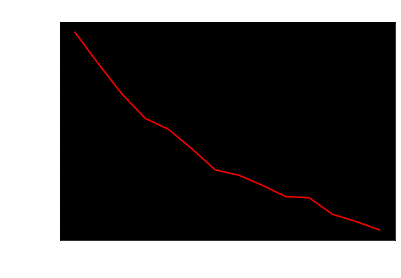

In [60]:
import matplotlib as mpl

Sum_of_squared_distances = []
K = range(1,15)
for num_clusters in K :
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(tf_idf)
    Sum_of_squared_distances.append(kmeans.inertia_)
plt.rcParams['axes.facecolor'] = 'black'
COLOR = 'white'
mpl.rcParams['text.color'] = COLOR
mpl.rcParams['axes.labelcolor'] = COLOR
mpl.rcParams['xtick.color'] = COLOR
mpl.rcParams['ytick.color'] = COLOR
plt.plot(K,Sum_of_squared_distances,'r')
plt.xlabel('Values of K') 
plt.ylabel('Sum of squared distances/Inertia') 
plt.title('Elbow Method For Optimal k')
plt.xticks([2, 4, 6,8,10,12,14])
plt.show()

### Silouhette Score

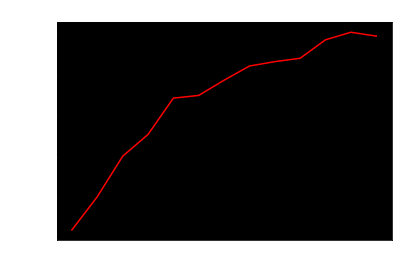

In [61]:
from sklearn.metrics import silhouette_score

range_n_clusters = [2, 3, 4, 5, 6, 7, 8,9,10,11,12,13,14]
silhouette_avg = []
for num_clusters in range_n_clusters:
 
# initialise kmeans
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(tf_idf)
    cluster_labels = kmeans.labels_
    # silhouette score
    score = silhouette_score(tf_idf, cluster_labels,metric='euclidean')
    silhouette_avg.append(score)
plt.plot(range_n_clusters,silhouette_avg,'r-')
plt.rcParams['axes.facecolor'] = 'black'
COLOR = 'white'
mpl.rcParams['text.color'] = COLOR
mpl.rcParams['axes.labelcolor'] = COLOR
mpl.rcParams['xtick.color'] = COLOR
mpl.rcParams['ytick.color'] = COLOR
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()

## Using KMeans with ideal number of Topics

In [ ]:
#Looking at Kmeans using standard 10 topics for K

num_clusters = 10
kmeans_model = KMeans(n_clusters=num_clusters, init='k-means++', n_init=1, 
                       verbose=False, max_iter=1000)
kmeans = kmeans_model.fit(tf_idf)
kmeans_clusters = kmeans.predict(tf_idf)
kmeans_distances = kmeans.transform(tf_idf)
sorted_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
terms = tf_idf_vectorizor.get_feature_names()
for i in range(num_clusters):
    print("Cluster %d:" % i)
    for j in sorted_centroids[i, :10]:
        print(' %s' % terms[j])
    print()

### Hyper parameter tuning with ideal k-topics

### Tuned Kmeans Final output

### LSTM

### HCA - is not working

In [17]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch